### Learning Objectives:

Parse data from HTML
- Beautiful Soup
- Scrappy (framework)

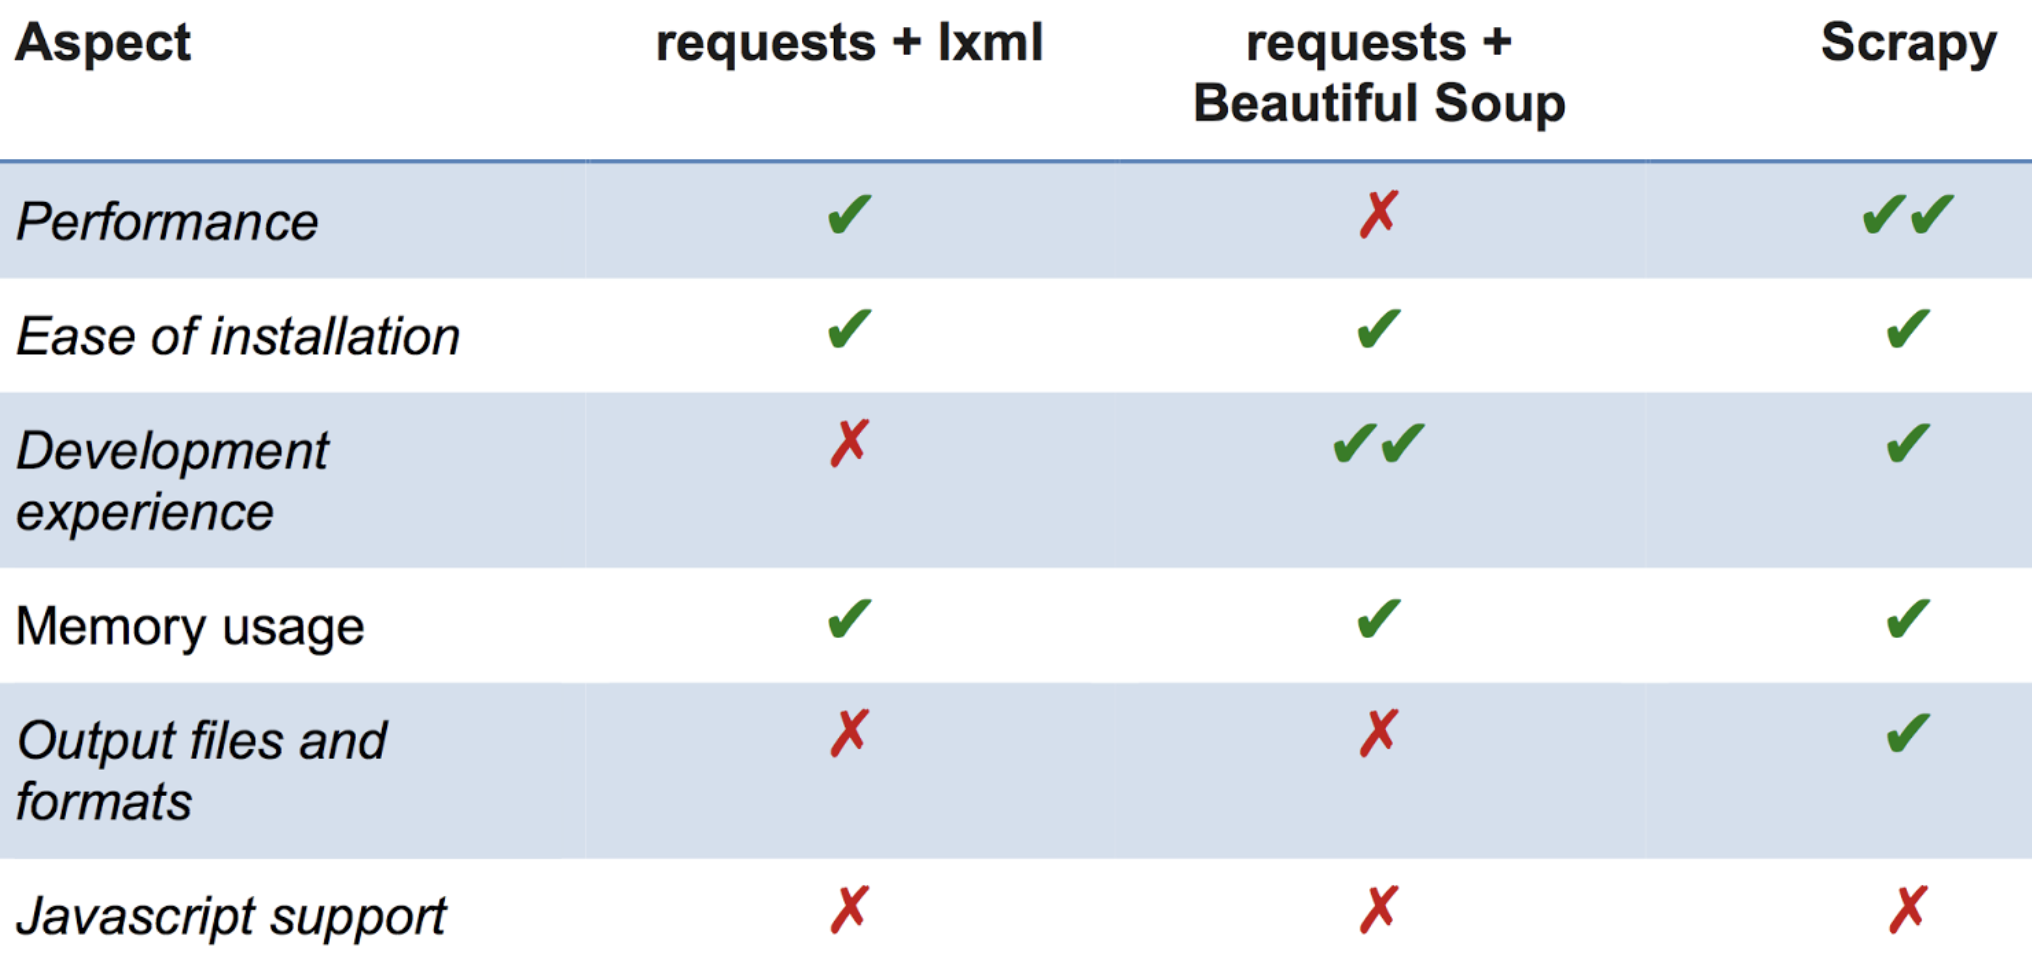

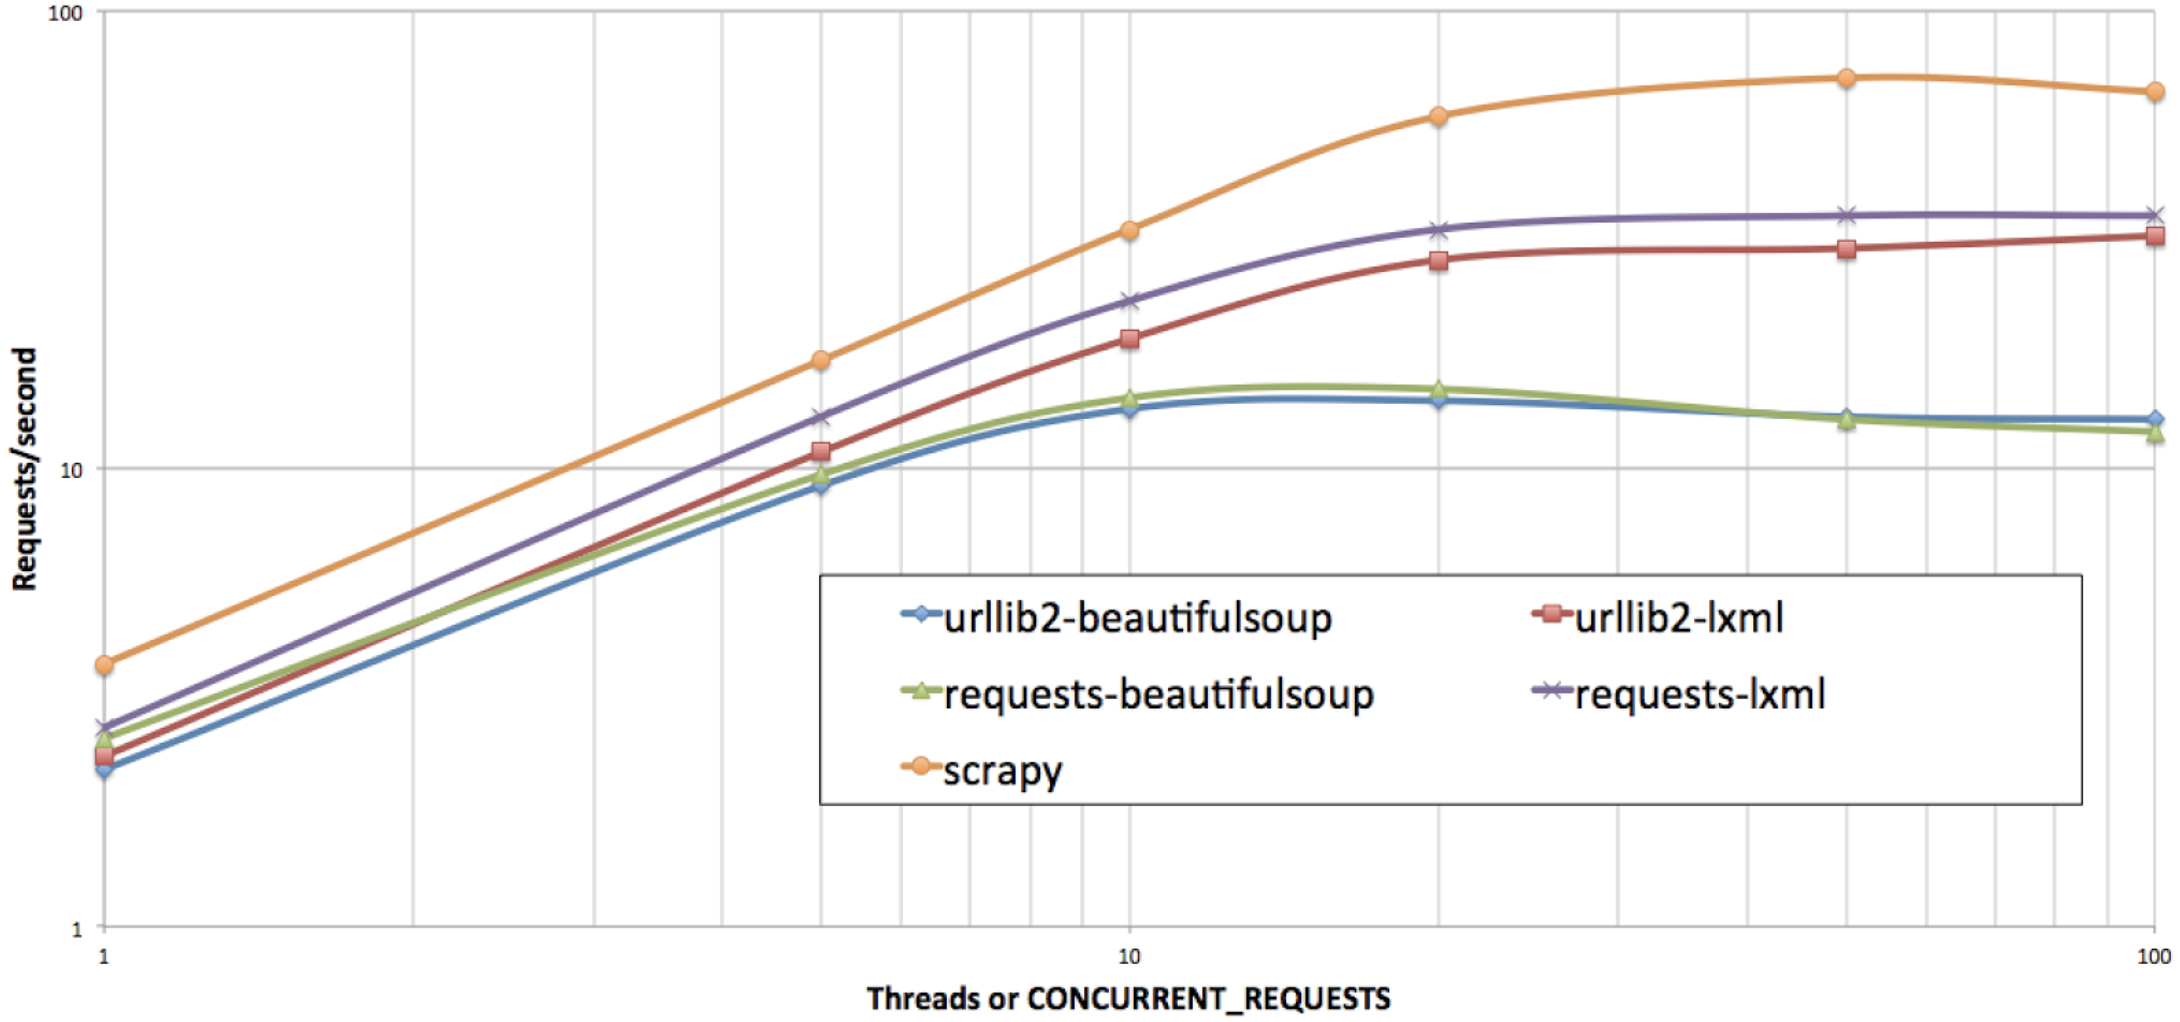

http://www.scrapinginsider.com/2016/01/scrapy-urllib2-requests-beautifulsoup-lxml.html

### Request

Primary Python library used for web requests is requests

- status check
- get page info
- web scraper
- API calls 

In [6]:
# install: pip install requests 
import requests

url = 'https://www.seek.com.au' 
response = requests.get(url)        # To execute get request 
print(response.status_code)     # To print http response code  

200


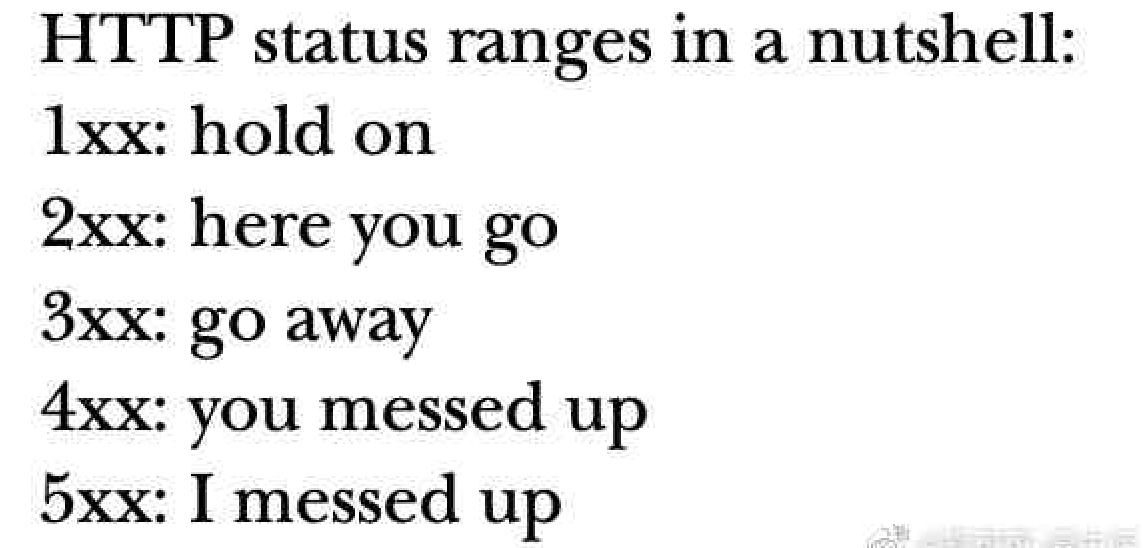

In [7]:
print(response.text)            # To print formatted JSON response 

<!doctype html>
<html lang="en" prefix="og: http://ogp.me/ns#">
  <head>
  <meta charset="utf-8">
  <meta name="referrer" content="no-referrer-when-downgrade">
  <meta name="apple-mobile-web-app-capable" content="yes">
  <meta name="apple-mobile-web-app-title" content="SEEK">
  <meta name="mobile-web-app-capable" content="yes">
  <meta name="request-id" content="MC41MDMyNTk2ODU3Njg0NTg0">
  <meta name="theme-color" content="#0d3880">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">
  <link rel="icon" href="/static/shared-web/favicon-4e1897dfd0901e8a3bf7e604d3a90636.ico">
<link rel="apple-touch-icon" href="/static/shared-web/iphone-2a9b65f22fc35e35808fcc317eb63810.png">
<link rel="apple-touch-icon" sizes="76x76" href="/static/shared-web/ipad-d50023448fe0126ad1da4390a4af7f72.png">
<link rel="apple-touch-icon" sizes="120x120" href="/static/shared-web/iphoneRetina-e9d6d0fc8904f8483487b0916046840b.png">
<link rel="apple-touch-icon" si

### Beautiful Soup

In [8]:
# Primary Python library for parsing HTML is BeautifulSoup

# install: pip install beautifulsoup4

from bs4 import BeautifulSoup

url = 'https://www.seek.com.au'

requestbs = requests.get(url)

if requestbs.status_code == 200:
   soup = BeautifulSoup(requestbs.text)
   print(soup)

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="SEEK" name="apple-mobile-web-app-title"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="MC45MTE1OTE5NTQ5Njk3MDg1" name="request-id"/>
<meta content="#0d3880" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<link href="/static/shared-web/favicon-4e1897dfd0901e8a3bf7e604d3a90636.ico" rel="icon"/>
<link href="/static/shared-web/iphone-2a9b65f22fc35e35808fcc317eb63810.png" rel="apple-touch-icon"/>
<link href="/static/shared-web/ipad-d50023448fe0126ad1da4390a4af7f72.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/static/shared-web/iphoneRetina-e9d6d0fc8904f8483487b0916046840b.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/static/shared-web/ipadReti

Step 1: set base search page 

- url_base = 'https://www.seek.com.au'

Step 2: get initial search page 

- res = requests.get(url_base)

Step 3: extract job, company, descriptions etc (xpath, css)

- for job in jobs:
  -  title = 
  -  company = 
  -  descriptions = 
  -  print()
    
Step 4: find next index page 
    

### Scrappy

In [1]:
#  From Parsing HTML.ipynb

from scrapy.crawler import CrawlerProcess  #scrappy in jupyter notebook
import scrapy


class SeekSpider(scrapy.Spider):
    name = "job_search"                 #spider name
    allowed_domains = ["seek.com.au"]   #web page
    
    #seed with the seek landing site for all data jobs in AUS
#     start_urls = ['https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=0-70000&salarytype=annual']
    start_urls = ['https://www.seek.com.au/data-scientist-jobs','https://www.seek.com.au/data-analyst-jobs']
    
    custom_settings = {
        'FEED_FORMAT' : 'csv',
        'FEED_URI' : 'seek_test13.csv'
        }
    
    def parse(self, response):
        
        print("-----------------")
        print("I just visited :" + response.url)
        print("-----------------")
        
        #grab list of all job ad links from search page
#         urls = response.css('h1 > a::attr(href)').extract()
        urls = response.css('article') # Need to find how to teach it to get to the URL
#         urls = response.css('//div[@searchRequestToken="c4b1de86-b261-4767-9330-1f2cc5b61f67"]/aritcle/div/div/href/text())
        
        #loop through list of links and visit each to grab the details
        for url in urls:
            # join the partial url with the domain to ensure correct operation
            url = response.urljoin(url)
            yield scrapy.Request(url = url, callback =self.parse_details)
            
        # grab the link for the next page
        next_page = response.css('a[data-automation="page-next"]::attr(href)').extract_first()
        
        # if 'next page' link present, go to and rinse and repeat
        if next_page is not None:
            # join next page link with Domain to ensure correct operation
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback = self.parse)
    
    def parse_details(self, response):
        yield {
            # grab and assign the job title
#             'title': response.xpath('//div[@class="FYwKg _6Gmbl_4"]/h1/text()')[0].extract()
#              'title': response.xpath('//div[@data-automation="searchResults"]/h1/text()')[0].extract() # This might need to get updated
            'title': response.xpath('//div[@searchRequestToken="c4b1de86-b261-4767-9330-1f2cc5b61f67"]/h1/text()')[0].extract() 
            #             "searchRequestToken":"c4b1de86-b261-4767-9330-1f2cc5b61f67"
#             searchResultsLoader
        }
        
process = CrawlerProcess()
process.crawl(SeekSpider)
process.start()

#  From Parsing HTML.ipynb

2022-01-30 13:57:25 [scrapy.utils.log] INFO: Scrapy 2.4.1 started (bot: scrapybot)
2022-01-30 13:57:25 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2022-01-30 13:57:25 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-01-30 13:57:25 [scrapy.crawler] INFO: Overridden settings:
{}
2022-01-30 13:57:25 [scrapy.extensions.telnet] INFO: Telnet Password: dee3a10e80ce3e66
2022-01-30 13:57:26 [py.warnings] WARNING: D:\ProgramData\Anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:247: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)

2022-01-

2022-01-30 13:57:26 [scrapy.core.engine] INFO: Spider closed (finished)


-----------------
I just visited :https://www.seek.com.au/data-scientist-jobs
-----------------
-----------------
I just visited :https://www.seek.com.au/data-analyst-jobs
-----------------


In [2]:
import pandas as pd

2022-01-30 11:59:54 [numexpr.utils] INFO: NumExpr defaulting to 8 threads.


In [3]:
pd.read_csv('seek_test13.csv')

EmptyDataError: No columns to parse from file

In [3]:
# data = pd.read_csv('seek_test.csv')

### Selenium

A webdriver allows python to interact with webpages as a human would using a specific browswer.

- automate workflows
- test or extract data from webpages

install: pip install selenium 

get a web drivers: 

Chrome: https://sites.google.com/a/chromium.org/chromedriver/
        
Firefox: https://github.com/mozilla/geckodriver/releases
        
- MacOS: copy to /usr/local/bin
- Windows: copy to C:\windows\system32 or elsewhere

In [4]:
##Step 1: Start the web browser 

# from selenium import webdriver

# Driver = selenium.webdriver.Chrome()

In [ ]:
##Step 2: Send the browser somewhere

# Driver.get("https://www.glassdoor.com.au")

In [ ]:
##Step 3: Find an element on the page

# Lgn = Driver.find_elements_by_name("login")[0]

# Password_Field = Driver.find_element_by_id(
#    "html-id-field")

In [ ]:
## Step 4: Interact

# Lgn.click()

# Password_Field.send_keys("hunter2")

In [ ]:
## Step 5: Save images or text

# Driver.save_screenshot("file.png")

# Driver.page_source

In [6]:
## example

# from selenium import webdriver

# driver = webdriver.Firefox()

# driver.get("https://en.wikipedia.org/wiki/Main_Page")

# wiki_search = driver.find_element_by_name("search")
# wiki_search.send_keys("australia")

# wiki_search_go_button = driver.find_element_by_name("go")
# wiki_search_go_button.click()

# print(driver.page_source)

# driver.quit()
